In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# GridSeachCV helps in fine tuning of our model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
`df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df['fname'] = df['Name'].apply(lambda x: x.split(',')[1])
df['lname'] = df['Name'].apply(lambda x: x.split(',')[0])

In [5]:
df.drop(['Name', 'fname', 'lname'], axis=1, inplace=True)

In [6]:
df.drop(['PassengerId', 'Cabin','Ticket'], axis=1, inplace=True)

In [7]:
age = df.Age.mean()
age

29.69911764705882

In [8]:
df.Age.fillna(age, inplace=True)
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

<ipython-input-8-fd51a1d8edc0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(age, inplace=True)
<ipython-input-8-fd51a1d8edc0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col:

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df.Sex = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
df['Sex'].value_counts()

,count
Sex,
1,577
0,314


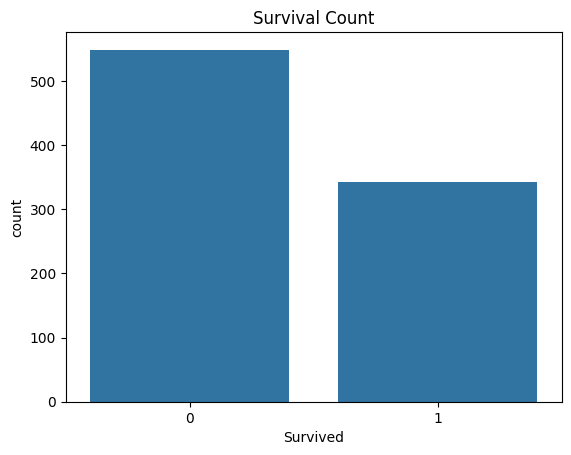

In [13]:
sns.countplot(x='Survived', data = df)
plt.title('Survival Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


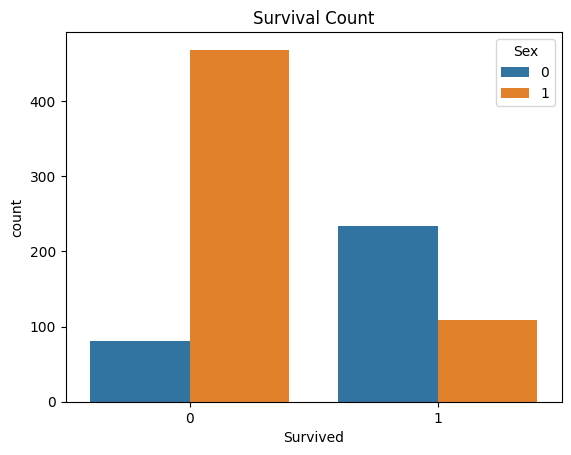

In [14]:
sns.countplot(x = 'Survived', hue ='Sex', data=df)
plt.title('Survival Count')
plt.show()

In [17]:


# Assuming df is already defined and contains your data
y = df['Survived']
X = df.drop(['Survived'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = gb.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [20]:
print(f"Accuary: {accuracy_score(y_test, y_pred)}")
#

Accuary: 0.7821229050279329


In [23]:
def get_user_input():
    print("Please enter the following details:  ")
    pclass = int(input("Enter class (1: 1st class, 2: 2nd class, 3: 3rd class): "))
    sex = int(input("Enter sex (1: male, 0: female): "))
    age = int(input("Enter age: "))
    sibsp = int(input("Enter number of siblings/spouses: "))
    parch = int(input("Enter number of parents/children: "))
    fare = float(input("Enter fare: "))  # Changed to float
    embarked = int(input("Enter embarked (0: Cherbourg, 1: Queenstown, 2: Southampton): "))
    user_input = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    return user_input


In [25]:
def get_pred_val(gb):
  user_input = get_user_input()
  pred = gb.predict(user_input)
  if pred == 1:
    print("Survived")
  else:
    print("Not Survived")
  # user_input
get_pred_val(gb)

Please enter the following details:  
Enter class (1: 1st class, 2: 2nd class, 3: 3rd class): 1
Enter sex (1: male, 0: female): 1
Enter age: 28
Enter number of siblings/spouses: 0
Enter number of parents/children: 1
Enter fare: 72.5
Enter embarked (0: Cherbourg, 1: Queenstown, 2: Southampton): 1
Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [28]:
gnb = GaussianNB()

In [29]:
param_grid = {
    'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [30]:
stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
grid_search = GridSearchCV(
    estimator = gnb,
    param_grid = param_grid,
    #cv = 5,
    cv = stratified,
    n_jobs = -1, # in processor there are multiple cores available, n_jobs = -1 uses all cpu cores
    verbose = 1,
    scoring = 'accuracy'
)

In [32]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=1)

In [33]:
best_param = grid_search.best_params_
best_scores = grid_search.best_score_
print(best_param)
print(best_scores)

{'var_smoothing': 1e-09}
0.7935782527331823


In [34]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(test_acc)

0.7821229050279329


In [35]:
confusion_matrix(y_test, y_pred)

array([[92, 18],
       [21, 48]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

